# Individual Coursework Assignment

## Business context - Helping Budget Auto Insurance

Vehicle insurance company - Budget Auto Insurance is looking to optimize its revenue with the
power of public domain data on the accidents available in UK government website. The aim is to
utilize vital information regarding the accident data and create a predictive modelling based on the
various variables which can be collected from customers such as vehicle type, age of the drive, sex
of the driver, engine capacity of the vehicle, driver home area type, propulsion code etc. to predict
the type of accident severity that can be anticipated from the customer and model the insurance
premium cost based on this target variable. Doing this would be beneficial to the company by
ensuring the right amount of premium is collected from customers more prone to severe accidents
and also gain more customers by providing lower premium to those who are not prone to severe
accidents.

The type of prediction problem being analyzed here is of supervised learning classification type, we train the dataset on the selected parameters which are treated appropriately to result in the best performance possible. 
The extended aim is to optimize the model using various data treatment methods and also by the efficient use of hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# setting logging to print only error messages
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)

import pandas as pd
import numpy as np

import time

### Loading dataset

In [3]:
trainset = pd.read_csv('trainset.csv')

In [4]:
testset = pd.read_csv('testset.csv')

In [5]:
trainset.head()

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Small town,Urban area
0,-2.177585,53.408598,Serious,2018,Two-wheeler,Male,25.0,Young Adult,999.0,Petrol,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.092945,51.379843,Slight,2020,Two-wheeler,Male,25.0,Young Adult,124.0,Petrol,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.853969,54.962991,Serious,2020,Two-wheeler,Male,25.0,Young Adult,125.0,Petrol,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-2.190595,53.853124,Slight,2018,Car,Female,28.0,Young Adult,998.0,Petrol,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.204440,51.488573,Serious,2019,Two-wheeler,Male,17.0,Teen,108.0,Petrol,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Data inspection for transformation

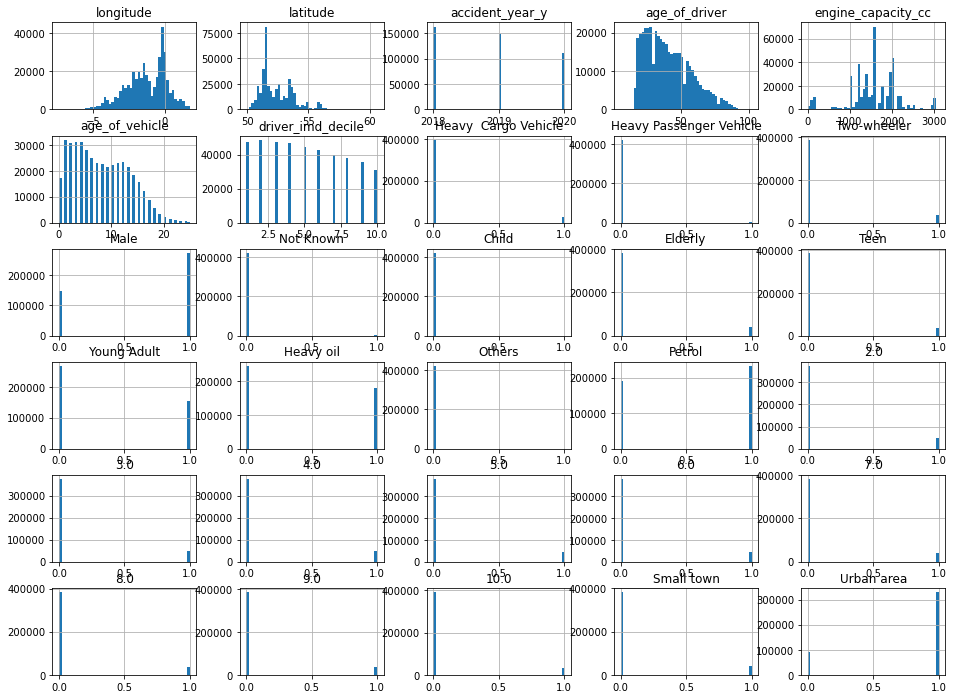

In [6]:
dummy = trainset.hist(bins=50, figsize=(16,12))

By analysing the above graphs we can understand there are some numerical variables which are skewed

## Variable transformation for performance

Machine learning performance is known to increase with the log transformation of heavy tailed variables to gain normal distribution, so that predictive power increases

### Log transformation

In [7]:
#Iterating over all the rows and log converting them
for x in ["age_of_vehicle", "age_of_driver"]:
    # add 1 so that 0s remain 0s
    trainset[x] = np.log(trainset[x] + 1)
    testset[x] = np.log(testset[x] + 1)

Dropping categorical variables already converted to dummy columns 

In [8]:
cols_to_drop = ['vehicle_type', 'sex_of_driver', 'age_band_of_driver', 'propulsion_code', 'driver_imd_decile', 'driver_home_area_type']
trainset.drop(columns=cols_to_drop, inplace=True)
testset.drop(columns=cols_to_drop, inplace=True)

### Scaling data

Scaling training data set to obtain good perfromance of the predictive model

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# take the target variable out before scaling
trainset_target = trainset["accident_severity"].values
trainset_predictors = trainset.drop("accident_severity", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['accident_severity'] = trainset_target

# inspect the data
trainset.head()

,longitude,latitude,accident_year_y,age_of_driver,engine_capacity_cc,age_of_vehicle,Heavy Cargo Vehicle,Heavy Passenger Vehicle,Two-wheeler,Male,...,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Small town,Urban area,accident_severity
0,-0.625563,0.725562,-1.102772,-1.007048,-1.001778,0.717615,-0.261002,-0.036962,3.372238,0.735583,...,-0.352484,-0.343413,-0.336184,3.096138,-0.314126,-0.303664,-0.281985,-0.321136,0.526332,Serious
1,0.837839,-0.753235,1.410843,-1.007048,-2.546855,-0.732592,-0.261002,-0.036962,3.372238,0.735583,...,-0.352484,2.911943,-0.336184,-0.322983,-0.314126,-0.303664,-0.281985,-0.321136,0.526332,Slight
2,-0.398387,1.858589,1.410843,-1.007048,-2.545089,-2.562549,-0.261002,-0.036962,3.372238,0.735583,...,2.837011,-0.343413,-0.336184,-0.322983,-0.314126,-0.303664,-0.281985,-0.321136,0.526332,Serious
3,-0.634696,1.049586,-1.102772,-0.733183,-1.003544,0.602757,-0.261002,-0.036962,-0.296539,-1.359465,...,-0.352484,-0.343413,-0.336184,-0.322983,-0.314126,-0.303664,-0.281985,-0.321136,0.526332,Slight
4,0.759571,-0.673980,0.154036,-1.929278,-2.575108,-1.112342,-0.261002,-0.036962,3.372238,0.735583,...,-0.352484,-0.343413,-0.336184,-0.322983,3.183436,-0.303664,-0.281985,-0.321136,0.526332,Serious


Performing the scaling for testing dataset

In [10]:
testset_target = testset["accident_severity"].values
testset_predictors = testset.drop("accident_severity", axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
testset['accident_severity'] = testset_target

## Training model

## Baseline

In [11]:
# the number of instances belonging to each class
trainset["accident_severity"].value_counts()

Slight     329526
Serious     85378
Fatal        8020
Name: accident_severity, dtype: int64

In [12]:
# total size of the training set
trainset.shape[0]

422924

The baseline classifier will output "Slight" for all predictions. We will use macro-averaging in this project (precision, recall and F-score are evaluated in each class separately and then averaged across classes).

So if we apply the baseline classifier to all of the training set. 

For the "Slight" label, the accuracy measures will be:

* Precision: 329639/423063 = 0.779

* Recall: 329639/329639 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.877

For the "Serious" label, it will be:

* Precision: 0.0/0.0 = 0.0

* Recall: 0.0/85404 = 0.0

* F-score: 0.0

For the "Fatal" label, it will be:

* Precision: 0.0/0.0 = 0.0

* Recall: 0.0/8020 = 0.0

* F-score: 0.0

The averages of the two classes, i.e. the eventual baseline scores:

* **Precision: 0.26**

* **Recall: 0.33**

* **F-score: 0.29**

In [13]:
baseline_score = 0.29

# Feature selection

## Using Random Forest to understand feature importance

Using gridsearch algorithm for hyperparameter tuning to select the best hyperparameters, which iteratively runs all possible combinations and recommends the best possible

#### Defining the Xtrain and ytrain for model input

In [14]:
# drop labels for training set, but keep all others
Xtrain = trainset.drop("accident_severity", axis=1)

ytrain = trainset["accident_severity"].copy()

#### Defining Xtest and ytest for model input

In [15]:
# drop labels for training set, but keep all others
Xtest = testset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()

In [31]:
cols_to_keep = ['longitude','latitude','Two-wheeler', 'engine_capacity_cc', 'Urban area', 'age_of_driver', 'Male', 'age_of_vehicle', 'Elderly', 'Small town', 'accident_severity']

for col in testset.columns:
    if col not in cols_to_keep:
        testset.drop(columns=col, inplace=True)

In [17]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,
                          n_jobs = -1) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 660.2020349502563 seconds


In [19]:
rdf_initial = grid_search.best_estimator_
rdf_initial

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10,
                       random_state=7)

In [20]:
grid_search.best_score_

0.3325532871422376

In [21]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

16

In [22]:
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    rf_split_test_scores.append(val)

In [23]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
16,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10}",0.366051,0.332553,9.151186e+00
20,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10}",0.354068,0.327434,7.522344e+00
17,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",0.356360,0.325544,8.647456e+00
18,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.356332,0.325211,8.733904e+00
19,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 300}",0.356175,0.325185,8.700916e+00
21,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.348173,0.322290,7.434040e+00
22,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}",0.347833,0.322148,7.384386e+00
23,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 300}",0.347061,0.321507,7.362943e+00
12,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}",0.292583,0.292465,4.026397e-02
8,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}",0.292588,0.292457,4.484860e-02


Obtaining feature importance as part of the output from random forest model 1

In [24]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

latitude: 0.18661628268288646
longitude: 0.14814989404155765
engine_capacity_cc: 0.1296582007090638
age_of_driver: 0.11196935950584558
age_of_vehicle: 0.09230472487868742
Two-wheeler: 0.08081674550670227
Urban area: 0.03283117446418796
accident_year_y: 0.032074939277844085
Male: 0.027399062940904287
Elderly: 0.012236053626281879
Small town: 0.011752116542676612
9.0: 0.010779130039902824
10.0: 0.010444956499124303
4.0: 0.010130776011493696
3.0: 0.010075487755035114
8.0: 0.009999348422506335
6.0: 0.009961707087657553
5.0: 0.009897283836718685
7.0: 0.009580374954982356
Petrol: 0.009247334626812808
2.0: 0.00879203436897004
Young Adult: 0.008650820250226248
Heavy oil: 0.008269652564258961
Heavy  Cargo Vehicle: 0.006477310805790395
Teen: 0.006305435747258701
Heavy Passenger Vehicle: 0.0028340848876620404
Not Known: 0.0018593275573753234
Others: 0.0007696943500193135
Child: 0.00011668605756714788


In [25]:
# Saving the created model for further analysis
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(rdf_initial, 'models/rdf-init.joblib')

['models/rdf-init.joblib']

Based on the random forest importance score, we choose the best 11 in the hopes of improving the model performance

1. Longitude
2. Latitude
3. Engine capacity in cc
4. Age of driver
5. Age of vehicle
6. Two-wheeler
7. Urban area
8. Male
9. Elderly
10. Small town

In [26]:
#cols_to_keep = []
trainset.columns

Index(['longitude', 'latitude', 'accident_year_y', 'age_of_driver',
       'engine_capacity_cc', 'age_of_vehicle', 'Heavy  Cargo Vehicle',
       'Heavy Passenger Vehicle', 'Two-wheeler', 'Male', 'Not Known', 'Child',
       'Elderly', 'Teen', 'Young Adult', 'Heavy oil', 'Others', 'Petrol',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       'Small town', 'Urban area', 'accident_severity'],
      dtype='object')

In [32]:
cols_to_keep = ['longitude','latitude','Two-wheeler', 'engine_capacity_cc', 'Urban area', 'age_of_driver', 'Male', 'age_of_vehicle', 'Elderly', 'Small town', 'accident_severity']

for col in trainset.columns:
    #Iterative loop to go through all columns and retain those which are selected through feature importance
    if col not in cols_to_keep:
        trainset.drop(columns=col, inplace=True)

In [34]:
trainset.head()

,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,Two-wheeler,Male,Elderly,Small town,Urban area,accident_severity
0,-0.625563,0.725562,-1.007048,-1.001778,0.717615,3.372238,0.735583,-0.32497,-0.321136,0.526332,Serious
1,0.837839,-0.753235,-1.007048,-2.546855,-0.732592,3.372238,0.735583,-0.32497,-0.321136,0.526332,Slight
2,-0.398387,1.858589,-1.007048,-2.545089,-2.562549,3.372238,0.735583,-0.32497,-0.321136,0.526332,Serious
3,-0.634696,1.049586,-0.733183,-1.003544,0.602757,-0.296539,-1.359465,-0.32497,-0.321136,0.526332,Slight
4,0.759571,-0.673980,-1.929278,-2.575108,-1.112342,3.372238,0.735583,-0.32497,-0.321136,0.526332,Serious


## Oversampling for more prediction accuracy for imbalanced data

Here we observe and acknowledge the presence of a big imbalance between the categories of the data, i.e, majority category in our data is Slight which covers upto 78% of the data, next is Serious category with 20% data and finally we have Fatal which has only 2% of the data. Hence as we can observe there is a need for ensuring the model has sufficient data to learn from so that the categories are not wrongly assigned. To tackle this we use oversampling which reproduces the same data to assigned number of times so that model has sufficient data to learn from

In [35]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy={"Slight":329526, 'Serious': 100000, 'Fatal': 100000})
# fit and apply the transform
Xtrain, ytrain = over.fit_resample(Xtrain, ytrain)

## Model 1 - Logistic Regression - Multinomial

Logistic regression can be used for classification problems where it predicts the probability of the occurence of a category based on various predictor variables using the odds ratio and logit function

### Algorithm definition and hyperparameter tuning using random grid search

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=7, multi_class = 'multinomial')

# specify the hyperparameters and their values
# 4 x 4 = 16 combinations in the grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Using 5-fold cross-validation
grid_search = RandomizedSearchCV(lr, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,
                          n_jobs = -1) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
lr_time = time.time() - start
print(f"Took {lr_time} seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.3126744  0.31264416 0.31264231
        nan        nan        nan        nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan 0.31272743 0.31269375 0.31268813
        nan        nan        nan        nan]
  warnings.warn(


Took 109.44863295555115 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Summarizing model characteristics

This code block shows the best set of hyperparameters that are selected from the input given to the random grid search

In [51]:
lr_Best_Estimate = grid_search.best_estimator_
lr_Best_Estimate

LogisticRegression(multi_class='multinomial', random_state=7, solver='saga')

This score denotes the model score which is obtained post training

In [52]:
lr_grid_score = grid_search.best_score_
lr_grid_score

0.31267439562100546

In [53]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

3

In [54]:
lr_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    lr_split_test_scores.append(val)

### Visualizing the changes of score based on various combinations of hyper parameters

In [55]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'solver': 'saga', 'penalty': 'l2'}",0.312727,0.312674,0.016959
4,"{'solver': 'saga', 'penalty': 'l1'}",0.312694,0.312644,0.015861
5,"{'solver': 'lbfgs', 'penalty': 'l2'}",0.312688,0.312642,0.014655
0,"{'solver': 'sag', 'penalty': 'elasticnet'}",NaN,NaN,NaN
1,"{'solver': 'lbfgs', 'penalty': 'elasticnet'}",NaN,NaN,NaN
2,"{'solver': 'newton-cg', 'penalty': 'l1'}",NaN,NaN,NaN
6,"{'solver': 'newton-cg', 'penalty': 'elasticnet'}",NaN,NaN,NaN
7,"{'solver': 'lbfgs', 'penalty': 'l1'}",NaN,NaN,NaN
8,"{'solver': 'sag', 'penalty': 'l1'}",NaN,NaN,NaN
9,"{'solver': 'saga', 'penalty': 'elasticnet'}",NaN,NaN,NaN


In [56]:
# Saving the created model for further analysis
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(lr_Best_Estimate, 'models/lr-clf.joblib')

['models/lr-clf.joblib']

### Calculating model performance for testing

In [57]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

best_lr = load("models/lr-clf.joblib")
# rf
yhat_lr = best_lr.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, lr_test_score, s = precision_recall_fscore_support(ytest, yhat_lr, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {lr_test_score}")

Random Forest:
Precision: 0.4118379206333665
Recall: 0.3815694637328843
F score: 0.3160361719824377


## Model interpretation

### Overfitting test

Here we test for overfitting by checking the difference between the performance of the dataset from training to dataset. For this test I have assumed a threshold difference of 15% over which we shall assume the model is overfitting

In [58]:
diff_overfitting = (lr_grid_score - lr_test_score)*100
diff_overfitting = round(diff_overfitting,2)
print(f'The difference between performance of model for training set against test is {diff_overfitting}%')
if diff_overfitting < 15:
    print('The difference between training and test performance is less, overfitting may not be present')
else:
    print('The difference between training and test performance is too high, overfitting may be present')

The difference between performance of model for training set against test is -0.34%
The difference between training and test performance is less, overfitting may not be present


### Performance against baseline

In [59]:
diff_baseline_lr = (lr_grid_score - baseline_score)*100
diff_baseline_lr = round(diff_baseline_lr,2)
print(f'The model is performing {diff_baseline_lr}% better than the baseline model')
if diff_baseline_lr < 20:
    print('There is no significant improvement over baseline model')
else:
    print('There is a significant improvement over the baseline model')

The model is performing 2.27% better than the baseline model
There is no significant improvement over baseline model


### Confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
#Command to create array of values predicted against actual
cfsn_matrix = confusion_matrix(ytest, yhat_lr)
print(cfsn_matrix)

[[  462     0  1807]
 [ 2265     9 20488]
 [ 5130    14 81600]]


In [61]:
#Converting the values into proportions based on category
cfsn_matrix = (cfsn_matrix.T/cfsn_matrix.sum(axis=1)).T

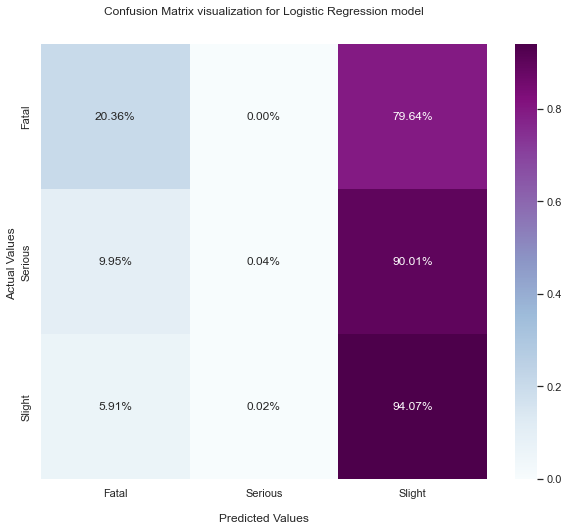

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

#Setting figure size
sns.set(rc={'figure.figsize':(10,8)})
#Creating heatmap to visually interpret the values better
ax = sns.heatmap(cfsn_matrix, annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Confusion Matrix visualization for Logistic Regression model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Setting ticket labels
ax.xaxis.set_ticklabels(['Fatal','Serious', 'Slight'])
ax.yaxis.set_ticklabels(['Fatal','Serious', 'Slight'])

# Displaying the heatmap
plt.show()

### Model summarization 
The difference between performance of model for training set against test is -0.34%
The difference between training and test performance is less, overfitting may not be present
The model is performing 2.27% better than the baseline model
There is no significant improvement over baseline model
The confusion matrix clearly shows bias of the model which is mainly choosing the majority category for all the categories
Overall this is not the best model for our analysis

## Model 2 - Random Forest - Classifier

Random forest is an ensemble method which aggregates the decision over multiple decision trees via bootstrapping and provides the resulting prediction. This is an efficient method where power of decision trees is amplified in some cases, however with this method the interpretability of decision trees is lost

### Algorithm definition and hyperparameter tuning using random grid search

In [65]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=7, class_weight = 'balanced_subsample' )

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [35, 55],
}

# Using 5-fold cross-validation
grid_search = RandomizedSearchCV(rf, param_grid, cv=3,
                           scoring='f1_macro', 
                           return_train_score=True,
                           n_jobs = -1
                          ) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
rf_time = time.time() - start
print(f"Took {rf_time} seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Took 222.52385830879211 seconds


### Summarizing model characteristics

This code block shows the best set of hyperparameters that are selected from the input given to the random grid search

In [66]:
rf_best_estimate = grid_search.best_estimator_
rf_best_estimate

RandomForestClassifier(class_weight='balanced_subsample', max_depth=55,
                       n_estimators=200, random_state=7)

This score denotes the model score which is obtained post training

In [67]:
rf_train_score = grid_search.best_score_
rf_train_score

0.8083131715396913

In [68]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

3

In [69]:
rf_split_test_scores = []
for x in range(3):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    rf_split_test_scores.append(val)

### Visualizing the changes of score based on various combinations of hyper parameters

In [70]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'n_estimators': 200, 'max_depth': 55}",0.913130,0.808313,11.478803
2,"{'n_estimators': 100, 'max_depth': 55}",0.912331,0.808047,11.430498
1,"{'n_estimators': 200, 'max_depth': 35}",0.911458,0.806969,11.463966
0,"{'n_estimators': 100, 'max_depth': 35}",0.910097,0.806371,11.397291


In [71]:
#Saving the model for further analysis
dump(rf_best_estimate, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

### Calculating model performance for testing

In [72]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

best_rf = load("models/rf-clf.joblib")
# rf
yhat_rf = best_rf.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, rf_test_score, s = precision_recall_fscore_support(ytest, yhat_rf, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {rf_test_score}")

Random Forest:
Precision: 0.9100625691047585
Recall: 0.6285434482222879
F score: 0.7019017382376092


## Model interpretation

### Overfitting test

Here we test for overfitting by checking the difference between the performance of the dataset from training to dataset. For this test I have assumed a threshold difference of 15% over which we shall assume the model is overfitting

In [73]:
diff_overfitting = (rf_train_score - rf_test_score)*100
diff_overfitting = round(diff_overfitting,2)
print(f'The difference between performance of model for training set against test is {diff_overfitting}%')
if diff_overfitting < 15:
    print('The difference between training and test performance is less, overfitting may not be present')
else:
    print('The difference between training and test performance is too high, overfitting may be present')

The difference between performance of model for training set against test is 10.64%
The difference between training and test performance is less, overfitting may not be present


### Performance against baseline

In [110]:
diff_baseline_rf = (rf_train_score - baseline_score)*100
diff_baseline_rf = round(diff_baseline_rf,2)
print(f'The model is performing {diff_baseline_rf}% better than the baseline model')
if diff_baseline_rf < 20:
    print('There is no significant improvement over baseline model')
else:
    print('There is a significant improvement over the baseline model')

The model is performing 51.83% better than the baseline model
There is a significant improvement over the baseline model


### Confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
cfsn_matrix = confusion_matrix(ytest, yhat_rf)

print(cfsn_matrix)

[[ 1294    61   914]
 [   13  7333 15416]
 [   30   562 86152]]


In [76]:
cfsn_matrix = (cfsn_matrix.T/cfsn_matrix.sum(axis=1)).T

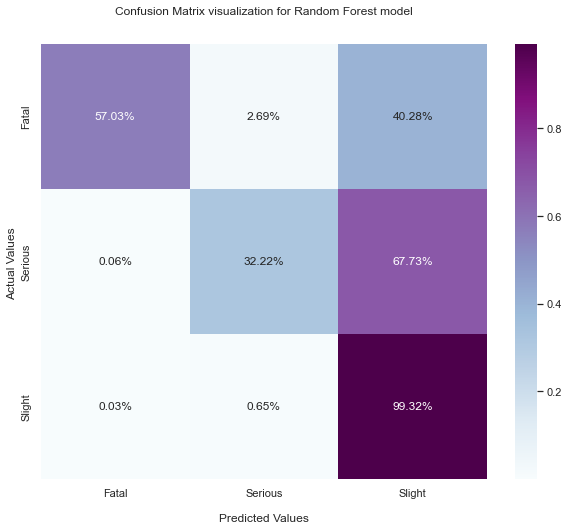

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(cfsn_matrix, annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Confusion Matrix visualization for Random Forest model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fatal','Serious', 'Slight'])
ax.yaxis.set_ticklabels(['Fatal','Serious', 'Slight'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Model interpretation 
The difference between performance of model for training set against test is 10.64%
The difference between training and test performance is less, overfitting may not be present
The model is performing 51.83% better than the baseline model
There is a significant improvement over the baseline model
The confusion matrix shows considerably good performance of the model for random forest algorithm, as we can see with the majority of the testing being atleast being predicted as the right category even for 1 minority variable - Fatal. This provides us good confidence with the model, however the prediction of Serious category is not very strong

## Model 3 - Neural network - Multilayer perceptron - Classifier

This is a powerful algorithm with generally strong predictive power, it considers input and appplies weights and bias by converting them into activation functtion in the hidden layer and ultimately provide the output in the output layer. The number of hidden layer and the nodes which help with this transformation are some of the hyperparameters to this model

### Algorithm definition and hyperparameter tuning using random grid search

In [78]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=7, max_iter = 300)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'hidden_layer_sizes': [(50,2), (75, 2)],
    'activation': ['relu', 'identity']
}

# we'll use 5-fold cross-validation
grid_search = RandomizedSearchCV(nn, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,
                          n_jobs = -1) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
nn_time = time.time() - start
print(f"Took {nn_time} seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Took 622.2442963123322 seconds


### Summarizing model characteristics

This code block shows the best set of hyperparameters that are selected from the input given to the random grid search

In [79]:
nn_best_estimate = grid_search.best_estimator_
nn_best_estimate

MLPClassifier(hidden_layer_sizes=(75, 2), max_iter=300, random_state=7)

This score denotes the model score which is obtained post training

In [80]:
nn_train_score = grid_search.best_score_
nn_train_score

0.4363841423245082

In [81]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

1

In [82]:
nn_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    nn_split_test_scores.append(val)

### Visualizing the changes of score based on various combinations of hyper parameters

In [83]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
1,"{'hidden_layer_sizes': (75, 2), 'activation': 'relu'}",0.440687,0.436384,0.976413
0,"{'hidden_layer_sizes': (50, 2), 'activation': 'relu'}",0.406364,0.404157,0.543231
2,"{'hidden_layer_sizes': (50, 2), 'activation': 'identity'}",0.311666,0.311603,0.020208
3,"{'hidden_layer_sizes': (75, 2), 'activation': 'identity'}",0.308223,0.308109,0.037016


In [84]:
#Saving the model
dump(nn_best_estimate, 'models/nn-clf.joblib')

['models/nn-clf.joblib']

### Calculating model performance for testing

In [85]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

best_nn = load("models/nn-clf.joblib")
# nn
yhat_nn = best_nn.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, nn_test_score, s = precision_recall_fscore_support(ytest, yhat_nn, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {nn_test_score}")

Random Forest:
Precision: 0.3899943256720755
Recall: 0.4336532258043355
F score: 0.3190747899278263


## Model interpretation

### Overfitting test

Here we test for overfitting by checking the difference between the performance of the dataset from training to dataset. For this test I have assumed a threshold difference of 15% over which we shall assume the model is overfitting

In [86]:
diff_overfitting = (nn_train_score - nn_test_score)*100
diff_overfitting = round(diff_overfitting,2)
print(f'The difference between performance of model for training set against test is {diff_overfitting}%')
if diff_overfitting < 15:
    print('The difference between training and test performance is less, overfitting may not be present')
else:
    print('The difference between training and test performance is too high, overfitting may be present')

The difference between performance of model for training set against test is 11.73%
The difference between training and test performance is less, overfitting may not be present


### Performance against baseline

In [88]:
diff_baseline_nn = (nn_test_score - baseline_score)*100
diff_baseline_nn = round(diff_baseline_nn,2)
print(f'The model is performing {diff_baseline_nn}% better than the baseline model')
if diff_baseline_nn < 20:
    print('There is no significant improvement over baseline model')
else:
    print('There is a significant improvement over the baseline model')

The model is performing 2.91% better than the baseline model
There is no significant improvement over baseline model


### Confusion matrix

In [90]:
from sklearn.metrics import confusion_matrix
cfsn_matrix = confusion_matrix(ytest, yhat_nn)

print(cfsn_matrix)

[[  939    54  1276]
 [ 3928   167 18667]
 [10118   310 76316]]


In [91]:
cfsn_matrix = (cfsn_matrix.T/cfsn_matrix.sum(axis=1)).T

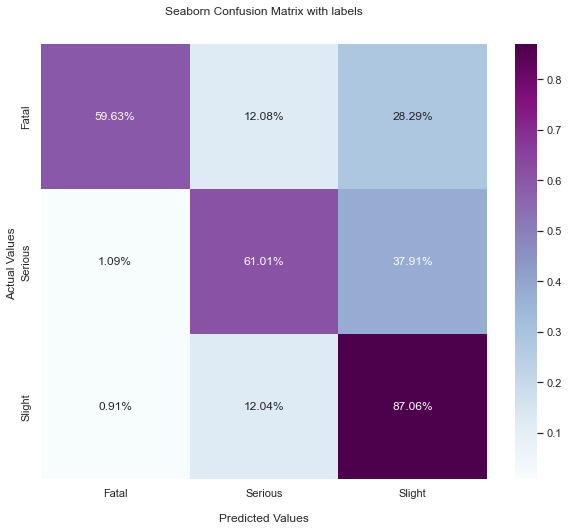

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(cfsn_matrix, annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fatal','Serious', 'Slight'])
ax.yaxis.set_ticklabels(['Fatal','Serious', 'Slight'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Model interpretation 
The difference between performance of model for training set against test is 11.73%
The difference between training and test performance is less, overfitting may not be present
The model is performing 2.91% better than the baseline model
There is no significant improvement over baseline model
The confusion matrix shows a heavy leaning of the model towards the most frequent category as observed with the logistic regression model. Due to these observations it can be concluded that this is not a good model 

## Model 4 - Decision tree - Classifier

Decision tree is a powerful method which provides good predictive power based on the logical bifurcations or branches created based on conditional statements. Another benefit of decision tree is that of interpretability, studying the tree we can easily understand the basis of prediction

### Algorithm definition and hyperparameter tuning using random grid search

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'max_depth': [40, 45, 50, 65, 75]
}

# we'll use 5-fold cross-validation
grid_search = RandomizedSearchCV(dtc, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,
                          n_jobs = -1) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
dt_time = time.time() - start
print(f"Took {dt_time} seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Took 33.30225706100464 seconds


### Summarizing model characteristics

This code block shows the best set of hyperparameters that are selected from the input given to the random grid search

In [94]:
dt_best_estimate = grid_search.best_estimator_
dt_best_estimate

DecisionTreeClassifier(max_depth=50, random_state=7)

This score denotes the model score which is obtained post training

In [95]:
dt_train_score = grid_search.best_score_
dt_train_score

0.8395374570030476

In [96]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

2

In [97]:
dt_split_test_scores = []
for x in range(3):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    dt_split_test_scores.append(val)

### Visualizing the changes of score based on various combinations of hyper parameters

In [98]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
2,{'max_depth': 50},0.999985,0.839537,16.045023
3,{'max_depth': 65},0.999993,0.839433,16.056103
4,{'max_depth': 75},0.999993,0.839433,16.056103
1,{'max_depth': 45},0.999881,0.839358,16.054123
0,{'max_depth': 40},0.999060,0.839266,15.994401


In [99]:
dump(dt_best_estimate, 'models/dt-clf.joblib')

['models/dt-clf.joblib']

### Calculating model performance for testing

In [100]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

best_dt = load("models/dt-clf.joblib")
# nn
yhat_dt = best_dt.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, dt_test_score, s = precision_recall_fscore_support(ytest, yhat_dt, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {dt_test_score}")

Random Forest:
Precision: 0.6739841639584393
Recall: 0.6923184516466359
F score: 0.6826931117514227


## Model interpretation

### Overfitting test

Here we test for overfitting by checking the difference between the performance of the dataset from training to dataset. For this test I have assumed a threshold difference of 15% over which we shall assume the model is overfitting

In [101]:
diff_overfitting = (dt_train_score - dt_test_score)*100
diff_overfitting = round(diff_overfitting,2)
print(f'The difference between performance of model for training set against test is {diff_overfitting}%')
if diff_overfitting < 15:
    print('The difference between training and test performance is less, overfitting may not be present')
else:
    print('The difference between training and test performance is too high, overfitting may be present')

The difference between performance of model for training set against test is 15.68%
The difference between training and test performance is too high, overfitting may be present


### Performance against baseline

In [102]:
diff_baseline_dt = (dt_train_score - baseline_score)*100
diff_baseline_dt = round(diff_baseline_dt,2)
print(f'The model is performing {diff_baseline_dt}% better than the baseline model')
if diff_baseline_rf < 20:
    print('There is no significant improvement over baseline model')
else:
    print('There is a significant improvement over the baseline model')

The model is performing 54.95% better than the baseline model
There is no significant improvement over baseline model


### Confusion matrix

In [103]:
from sklearn.metrics import confusion_matrix
cfsn_matrix = confusion_matrix(ytest, yhat_dt)

print(cfsn_matrix)

[[ 1353   274   642]
 [  247 13887  8628]
 [  787 10441 75516]]


In [104]:
cfsn_matrix = (cfsn_matrix.T/cfsn_matrix.sum(axis=1)).T

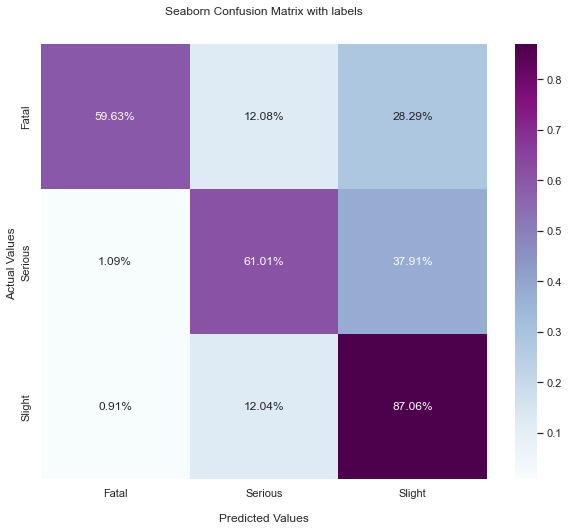

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(cfsn_matrix, annot=True, 
            fmt='.2%', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fatal','Serious', 'Slight'])
ax.yaxis.set_ticklabels(['Fatal','Serious', 'Slight'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Model interpretation 
The difference between performance of model for training set against test is 15.68%
The difference between training and test performance is too high, slight overfitting may be present
The model is performing 54.95% better than the baseline model
There is no significant improvement over baseline model
The confusion matrix shows promising results with True Positives and True Negatives proportion being the highest for all categories. This can be considered as one of the best model out of all the models considered so far.

## Key findings

### Time taken analysis

In [106]:
#Creating a list of all the time variables derived from respective models
time_list = [lr_time, rf_time, nn_time, dt_time]
models = ['Logistic Regression', 'Random Forest', 'Neural Network', 'Decision Tree']

<function matplotlib.pyplot.show(close=None, block=None)>

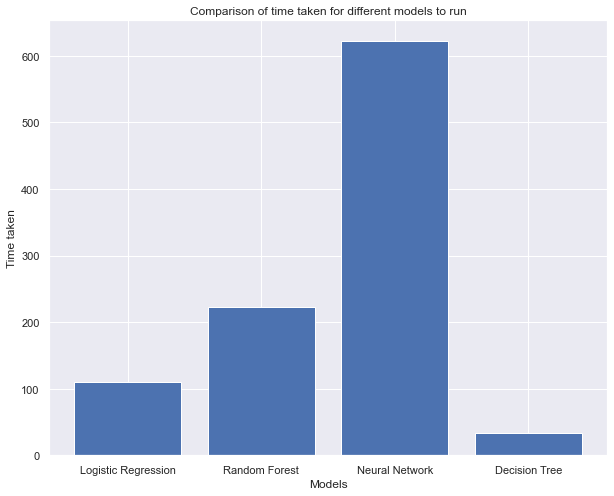

In [107]:
#Plotting a bar chart for understanding comparison of the time taken
import matplotlib.pyplot as plt
plt.bar(models, time_list)
plt.title('Comparison of time taken for different models to run')
plt.xlabel('Models')
plt.ylabel('Time taken')
plt.show

As we can see, Neural network takes the most time out of all the models considered for this project and the least time is taken by decision tree

### Baseline performance analysis

In [108]:
#Creating list of all the performance score against baseline model
performance_list = [diff_baseline_lr, diff_baseline_rf, diff_baseline_nn, diff_baseline_dt]

<function matplotlib.pyplot.show(close=None, block=None)>

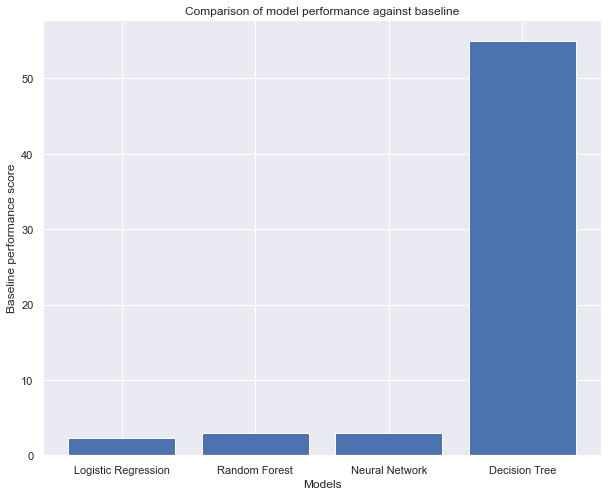

In [109]:
#Plotting a bar chart for understanding comparison of the time taken
import matplotlib.pyplot as plt
plt.bar(models, performance_list)
plt.title('Comparison of model performance against baseline')
plt.xlabel('Models')
plt.ylabel('Baseline performance score')
plt.show

It can be said that decision tree is the best performing model out of all the models considered followed by random forest, rest 2 models are not worth considering. Hence we can say that the best model which can be considered is Decision tree as it is a model which has the best performance score out of all the models and also it takes the least time for execution

Regarding this data analysis some of the key highlights which we can touch upon are as follows
1. Vast amount of data

there was nearly 420,000 rows of data taken into consideration. The problem posed by this is mainly regarding finding the apt amount of time for the program to do an extensive, exhaustive grid search. For the scope of the coursework initially exhaustive grid search was taken into consideration, post that to draw various conclusion due to the time factor, some compromises such as taking random grid search was taken due to which around 10% of performance was sacrificed. In a real life scenario this may be worth taking as for our insurance company very high level of accuracy is not exactly required because the nature of this prediction is already counterintuitive in nature

2. Category imbalance

of the target variable is a serious issue during machine learning classification problem, understanding and dealing with this can cause a boost of performance which was found in our dataset. As we saw above there is a huge imbalance i.e., around 70% belongs to one category which will lead the model to predict this category more often than not. 3 key approaches were taken to deal with this - Oversampling, Undersampling and doing both over and under at the same time. For this project Oversampling minority categories to a higher ration helped in improving the performance

3. Quality of data

There were around 300,000 rows of data dropped from the dataset due to missing rows. This is not a good indicator of data, with dropping such huge numbers we have lost crucial data in the process which could have potentially improved our model predictive performance. Lot of data pre processing steps were undertaken in the project including, handling outliers, scaling, category binning which helped improve the predicetive quality of the data

## Conclusion

The insurance company can definitely benefit from the predictive modelling discussed above. Some of the benefits which can be reaped by the company include
1. Offer cheaper premium to customers who are prone to low number of accidents. This can help the company beat the competition and get more customers.

2. Importance of variables can be helpful for the insurance company to know what exactly are the factors that are affecting the severity of accidents which is a source of potential burden to the company. Hence, the company can target  advertising depending on the various factors to gain more customers

3. Charge more premium to customers who are more prone to severe accidents. These customers are causing majority of the burden to the company. So company can strategize in such a way to avoid these type of customers based on the factors learnt